# Exploratory Data Analysis
Md Shahidullah Kawsar

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("whitegrid")
sns.set_context('talk')

# Loading the dataset

In [123]:
df = pd.read_csv('train.csv', parse_dates=['created_date'])
df['created_date'] = pd.to_datetime(df['created_date']).values.astype('datetime64[M]')

# print(df.head())
# print(df.describe())

# Distribution of the target variable

Text(0, 0.5, 'count')

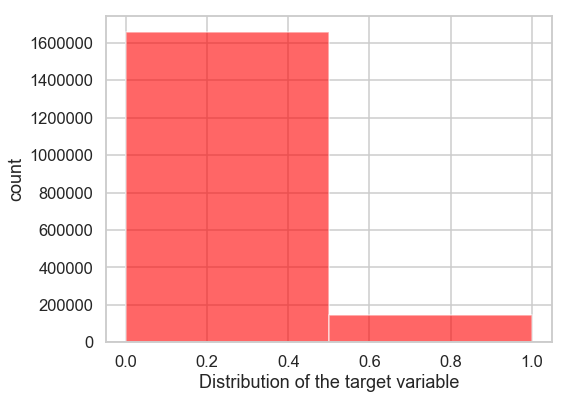

In [124]:
sns.set_palette(["red"])

plt.figure(figsize=(8,6))
plt.hist(df.target, bins=2, alpha=0.6)
plt.xlabel('Distribution of the target variable')
plt.ylabel('count')

# Percent of toxic comments related to different identities using target and population amount of each identity as weights

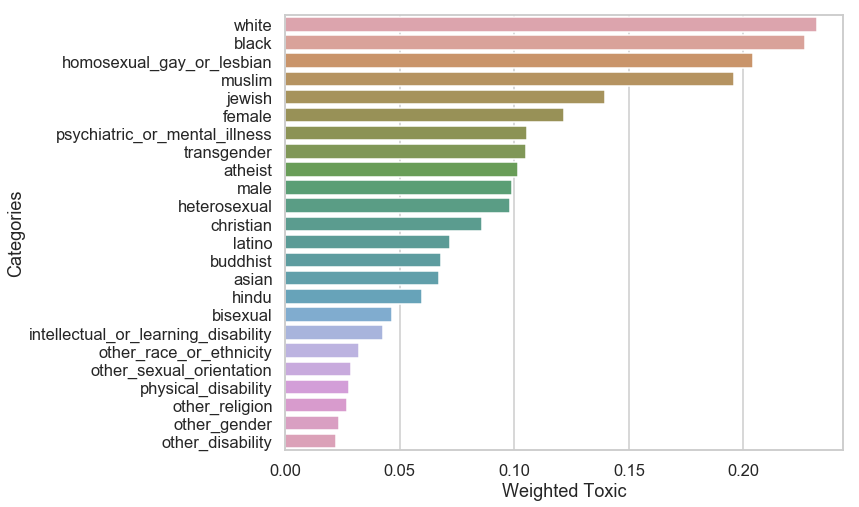

In [125]:
demographics = df.loc[:, ['target']+list(df)[slice(8,32)]].dropna()
weighted_toxic = demographics.iloc[:, 1:].multiply(demographics.iloc[:, 0], axis="index").sum()/demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()
weighted_toxic = weighted_toxic.sort_values(ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot(x = weighted_toxic.values, y = weighted_toxic.index, saturation=0.5)
plt.ylabel('Categories')
plt.xlabel('Weighted Toxic')
plt.show()

# Correlation heatmap of target variable and the identity variables which contain reactions in the comments

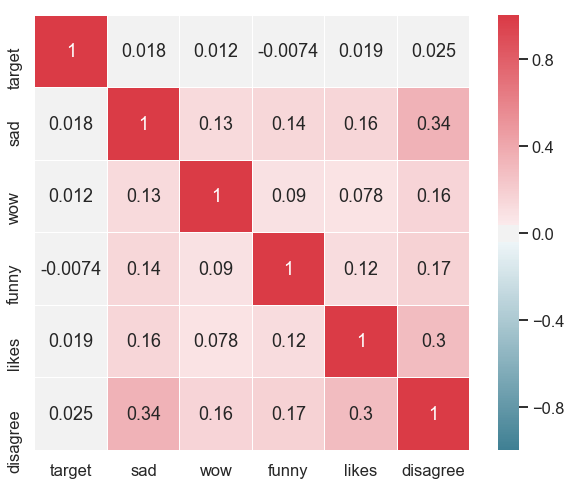

In [126]:
columns = df.loc[:, ["target", "sad", "wow", "funny", "likes", "disagree"]]
plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(columns.corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=cmap, linecolor='white', annot=True)

# Correlation heatmap of target variable, toxicity subtype attributes and the identity variables

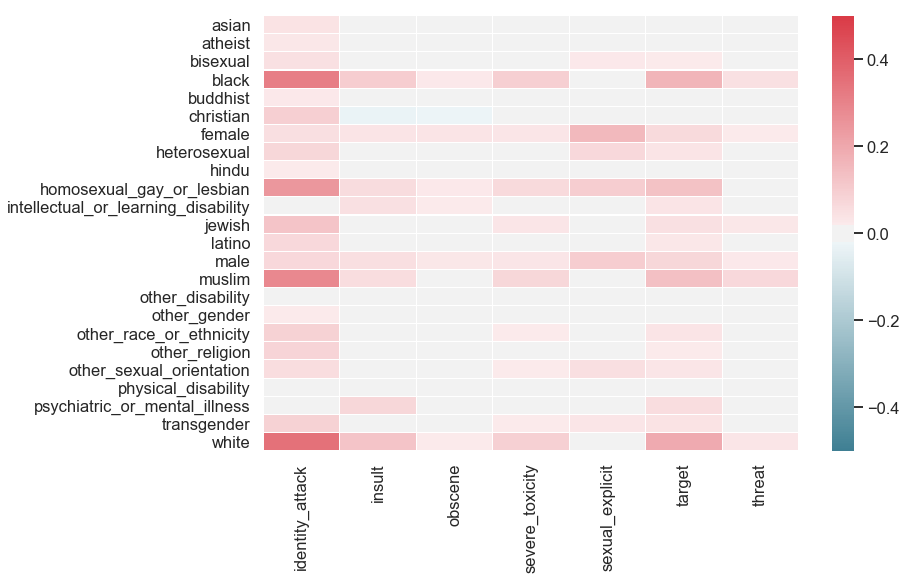

In [128]:
columns = ('target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit')
identities = tuple(df.iloc[:, 8:32])
rows = [{c:df[f].corr(df[c]) for c in columns} for f in identities]
poptoxicity_correlations = pd.DataFrame(rows, index=identities)

plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.set(font_scale=1.5)
ax = sns.heatmap(poptoxicity_correlations, vmin=-0.5, vmax=0.5, cmap=cmap, linewidths=0.1, linecolor='white')

# Distribution of the toxicity subtype attributes

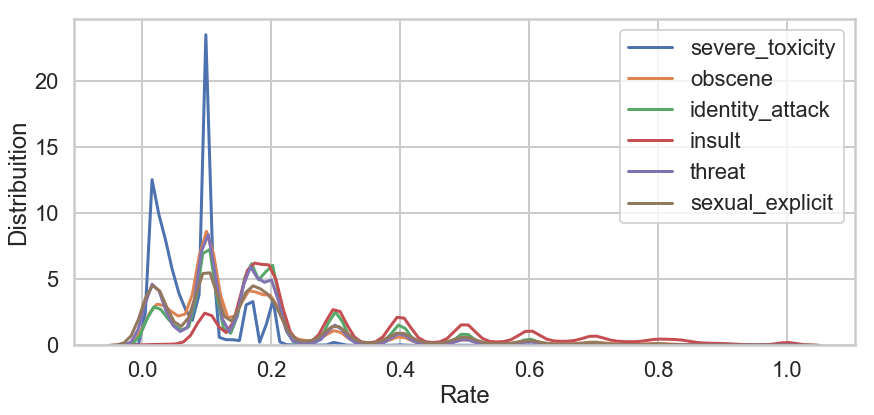

In [135]:
column = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']

sns.set()
sns.set_style("whitegrid")
sns.set_context('poster')

plt.figure(figsize=(14,6))
for col in column:
    g = sns.distplot(df[df[col]>0][col], label=col, hist=False)
    plt.xlabel("Rate")
    plt.ylabel("Distribuition")
    plt.legend()

plt.show()

# Time series analysis

In [93]:
sns.set_style("whitegrid")
sns.set_context('poster')

# Time Series analysis of Toxicity
# create dataframe with all the identity columns, target and creation date
data_with_data = df.loc[:, ['created_date', 'target']+list(df)[slice(8,32)]].dropna() 
# weight the identity scores, dividing each value by the sum of the whole column
data = data_with_data.iloc[:, 2:]/data_with_data.iloc[:, 2:].sum()  
# Multipy the weighted columns with the target variable
data_weighted = data.multiply(data_with_data.iloc[:, 1], axis="index")
data_weighted['created_date'] = pd.to_datetime(data_with_data['created_date']).values.astype('datetime64[M]')
# Group by the creation date
data = data_weighted.groupby(['created_date']).sum().sort_index()


# Time Series analysis of Toxicity & Gender

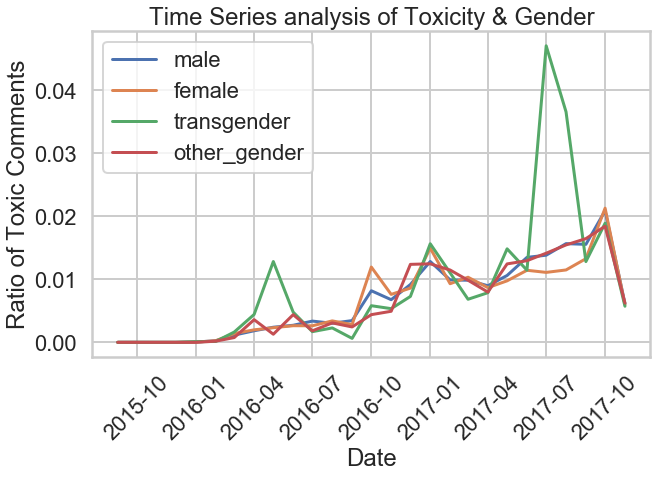

In [99]:

plt.figure(figsize=(10,6))
plt.plot(data.index, data['male'])
plt.plot(data.index, data['female'])
plt.plot(data.index, data['transgender'])
plt.plot(data.index, data['other_gender'])

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Ratio of Toxic Comments')
plt.title("Time Series analysis of Toxicity & Gender")
plt.legend()
plt.show()

# Time Series analysis of Toxicity & Sex

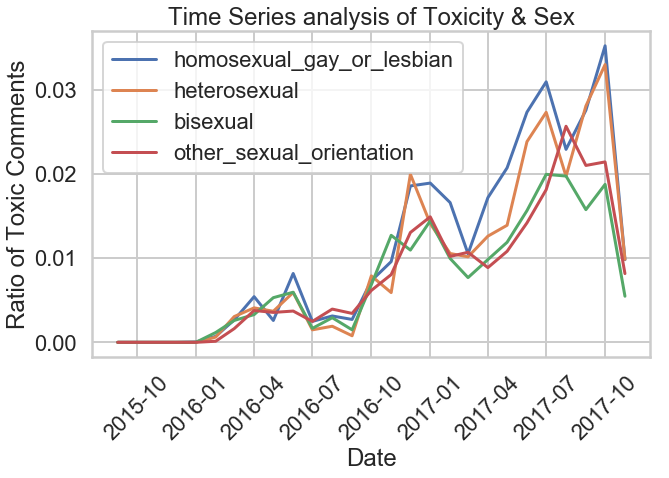

In [100]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['homosexual_gay_or_lesbian'])
plt.plot(data.index, data['heterosexual'])
plt.plot(data.index, data['bisexual'])
plt.plot(data.index, data['other_sexual_orientation'])

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Ratio of Toxic Comments')
plt.title("Time Series analysis of Toxicity & Sex")
plt.legend()
plt.show()

# Time Series analysis of Toxicity & Religion

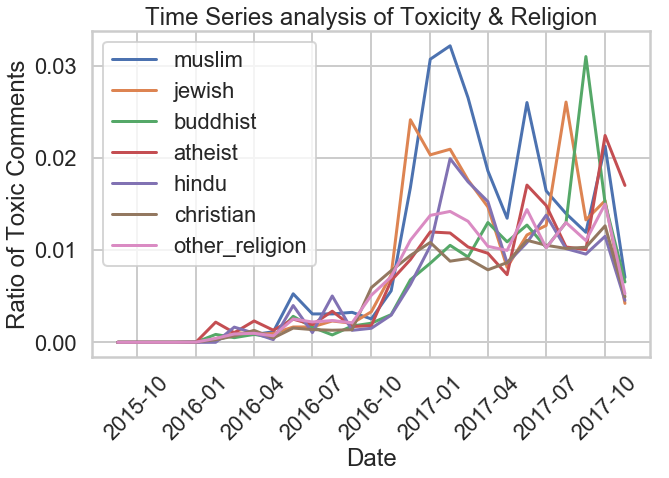

In [101]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['muslim'])
plt.plot(data.index, data['jewish'])
plt.plot(data.index, data['buddhist'])
plt.plot(data.index, data['atheist'])
plt.plot(data.index, data['hindu'])
plt.plot(data.index, data['christian'])
plt.plot(data.index, data['other_religion'])

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Ratio of Toxic Comments')
plt.title("Time Series analysis of Toxicity & Religion")
plt.legend()
plt.show()

# Time Series analysis of Toxicity & Race

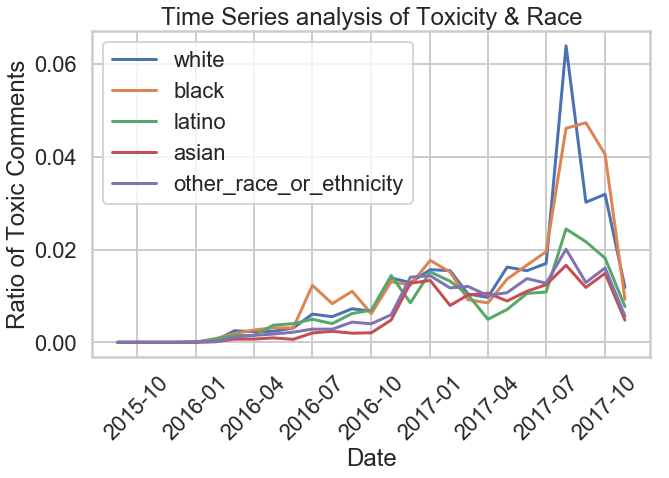

In [102]:

plt.figure(figsize=(10,6))
plt.plot(data.index, data['white'])
plt.plot(data.index, data['black'])
plt.plot(data.index, data['latino'])
plt.plot(data.index, data['asian'])
plt.plot(data.index, data['other_race_or_ethnicity'])

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Ratio of Toxic Comments')
plt.title("Time Series analysis of Toxicity & Race")
plt.legend()
plt.show()

# Time Series analysis of Toxicity & Disability

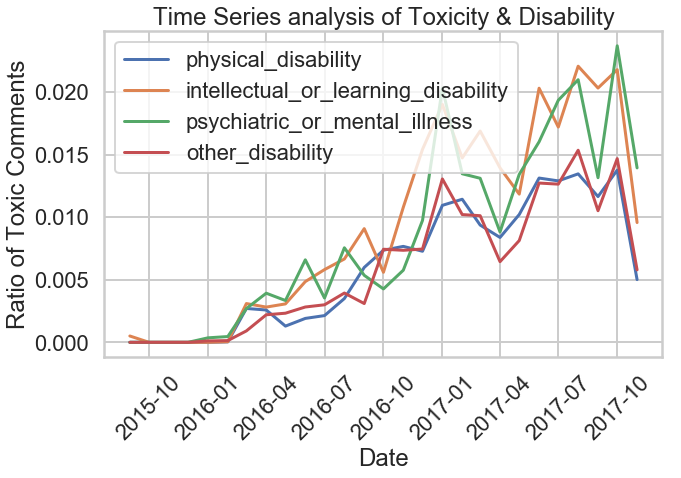

In [103]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['physical_disability'])
plt.plot(data.index, data['intellectual_or_learning_disability'])
plt.plot(data.index, data['psychiatric_or_mental_illness'])
plt.plot(data.index, data['other_disability'])

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Ratio of Toxic Comments')
plt.title("Time Series analysis of Toxicity & Disability")
plt.legend()
plt.show()